# 3.2: Hierarchical clustering

### 3.2.1 Show a low level dendrogram containing 5 instances of each digit ( one person ).


### RELOAD window: CTRL+SHIFT+P


## LINKS 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html?highlight=agglomerative%20clustering#sklearn.cluster.AgglomerativeClustering

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from typing import List
import sys
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist

sys.path.insert(0, '/home/agervig/git/sm_pca')

from utils import data_utils


In [3]:
data_csv = pd.read_csv("../data_proc.csv", header=None)
data = pd.DataFrame.to_numpy(data_csv)
data = np.delete(data, 0, 1)
np.random.shuffle(data)


#X_train, Y_train, X_test, Y_test = data_utils.split_data_all(data, 0.8)

In [4]:
def get_data_student_cifers(data: np.array, student_id: int, cifers: List, instances: int):
    """
    data: np.ndarray -> image data incl. studnet id (col 0) and labels (col 1)
    student_id: int -> the student id of the student you want the data from 
    cifers: List -> A list of the cifers of interrest, to extract from the data of the student. EX: [0,4,7] will give you cifers 0, 4, 7
    instances: int -> how many instances of each cifer to return 
    """

    data_cifers = []
    data_student = data[data[:,0] == student_id]
    for c in cifers:
        data_cifers.extend(data_student[data_student[:,1] == c][0:instances])
    data_cifers = np.array(data_cifers)
    return data_cifers

In [5]:
#Extracting data for one random student from the dataset
data_student = get_data_student_cifers(data, 1, [0,1,2,3,4,5,6,7,8,9], 5)
cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')
cluster.fit_predict(data_student[:,2:])

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0])

In [6]:
Z = shc.linkage(data_student[:,2:], 'ward')
#This returns a metric c that tells how well the clusters represent the data, wher 1 is a perfekt fit
c, coph_dist = shc.cophenet(Z, pdist(data_student[:,2:]))
print(c)
print(Z[:])


0.43858293500852386
[[7.00000000e+00 8.00000000e+00 9.40287722e+02 2.00000000e+00]
 [5.00000000e+00 9.00000000e+00 1.09017888e+03 2.00000000e+00]
 [6.00000000e+00 5.10000000e+01 1.25414592e+03 3.00000000e+00]
 [3.80000000e+01 3.90000000e+01 1.26252604e+03 2.00000000e+00]
 [1.60000000e+01 1.90000000e+01 1.39217133e+03 2.00000000e+00]
 [3.60000000e+01 3.70000000e+01 1.46055845e+03 2.00000000e+00]
 [0.00000000e+00 3.00000000e+01 1.46927942e+03 2.00000000e+00]
 [2.30000000e+01 2.40000000e+01 1.61819189e+03 2.00000000e+00]
 [1.10000000e+01 1.20000000e+01 1.62652021e+03 2.00000000e+00]
 [1.40000000e+01 4.60000000e+01 1.65877485e+03 2.00000000e+00]
 [4.50000000e+01 5.20000000e+01 1.66025631e+03 4.00000000e+00]
 [2.60000000e+01 3.30000000e+01 1.69605749e+03 2.00000000e+00]
 [1.00000000e+01 5.50000000e+01 1.71738939e+03 3.00000000e+00]
 [2.70000000e+01 3.10000000e+01 1.73550598e+03 2.00000000e+00]
 [2.00000000e+01 6.00000000e+01 1.77782794e+03 5.00000000e+00]
 [2.20000000e+01 4.90000000e+01 1.7

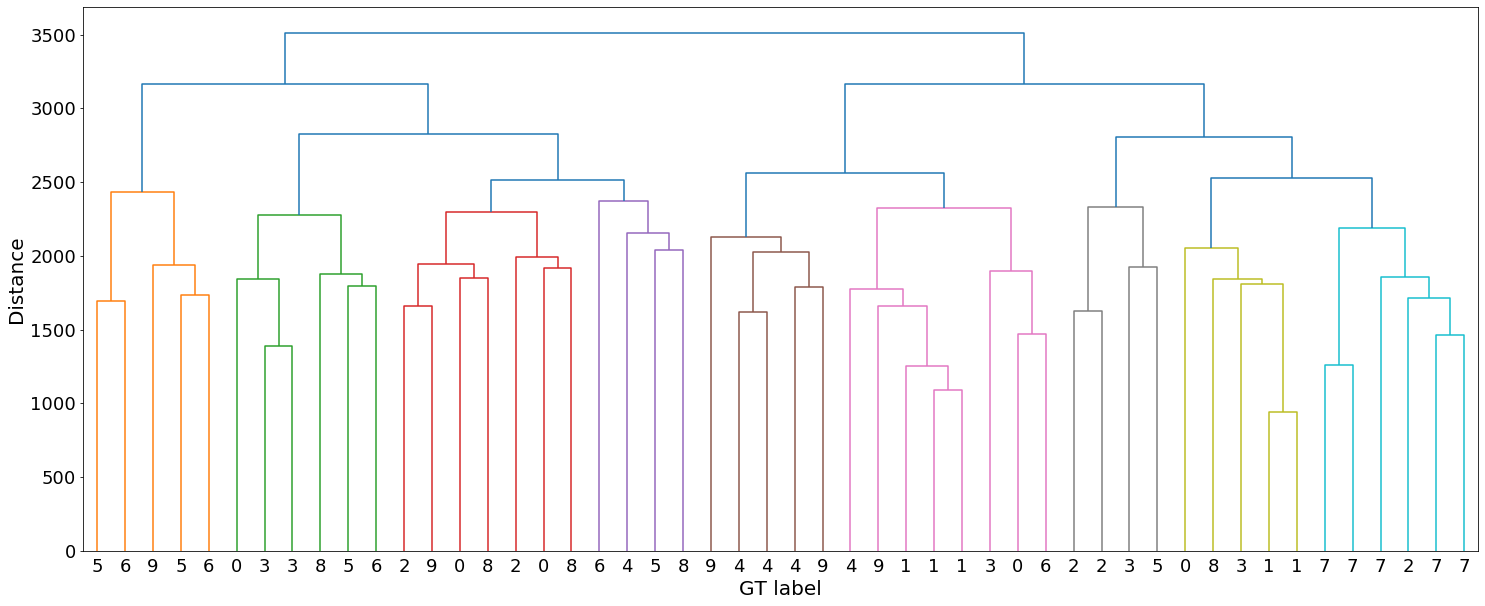

In [16]:
plt.figure(figsize=(25,10))
#plt.title("Hierarchical Clustering Dendrogram", fontsize = 20)
plt.xlabel("GT label", fontsize=20)
plt.ylabel("Distance", fontsize=20)
plt.yticks(fontsize=18)

dendrogram(Z, leaf_rotation=0., leaf_font_size=18., color_threshold=max(Z[:,2])*0.7, labels=data_student[:,1])
plt.show()

### 3.2.2 Use K-Means clustering to compress each digit into 5 clusters, as done in 3.1.1, and perform hierarchical clustering to show a low level dendrogram of this (one person).


### 3.2.3 Discuss the results and relate them to the cross validation tables from k-NN classification

In [ ]:
#lool at confusion matrix of cross val and compare to hierarchical clustering